In [1]:
import sys
import os
sys.path.append('D:\桌面\pytest\VAE学习及示例')

In [2]:
import torch
import torch.nn as nn
import numpy as np
import matplotlib.pyplot as plt
from data_prepare import dataset,data_vision
from train import fit
from model import Base_VAE
from torch.nn import functional as F

In [3]:
import argparse
def parse_args():
    parser = argparse.ArgumentParser()
    parser.add_argument('--dataset_name', type=str, default='xjtu', help='the name of dataset, xjtu or pu or simu')
    parser.add_argument('--seed', type=int, default=23, help='seed for random')
    parser.add_argument('--data_path', type=str, default=r'D:\桌面\pytest\VAE学习及示例\data', help='the data_path')
    parser.add_argument('--batch_size', type=int, default=64, help='the batch size')
    parser.add_argument('--num_of_see', type=int, default=4, help='the number of pre_1d_see')
    parser.add_argument('--epochs', type=int, default=50, help='the number of pre_1d_see')
    parser.add_argument('--latent_dim', type=int, default=100, help='the latent_dim')
    parser.add_argument('--lr', type=float, default=0.001, help='the epochs')
    # parser.add_argument('--dataset_name', type=str, default=r'.\result\AAU_Net', help='the output path')
    opt = parser.parse_args(args=[])

    return opt
args = parse_args()  



In [4]:
train_dl, test_dl = dataset.data_prepare_XJTU(args)
a,b = next(iter(test_dl))

tensor([ 2.,  2., 12.,  4.])


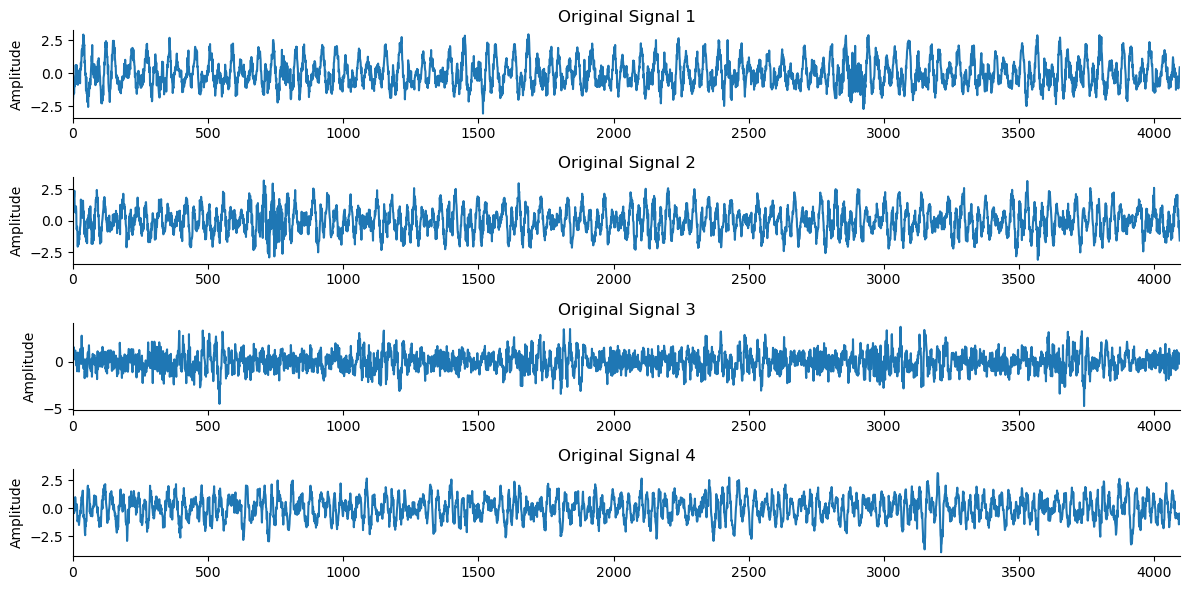

In [5]:
data_vision.pre_1d_see(train_dl, test_dl, args)

In [6]:
model = Base_VAE(args).cuda()
# specify loss function
criterion = nn.MSELoss()

# specify loss function
optimizer = torch.optim.Adam(model.parameters(), lr=0.001)

model(a.cuda())[0].shape

torch.Size([64, 1, 4096])

In [7]:
from torchsummary import summary
import torchvision.models as models

summary(model, input_size=(1,4096), batch_size=7, device='cuda')


----------------------------------------------------------------
        Layer (type)               Output Shape         Param #
            Conv1d-1              [7, 16, 2048]              64
       BatchNorm1d-2              [7, 16, 2048]              32
         LeakyReLU-3              [7, 16, 2048]               0
            Conv1d-4              [7, 32, 1024]           1,568
       BatchNorm1d-5              [7, 32, 1024]              64
         LeakyReLU-6              [7, 32, 1024]               0
            Conv1d-7               [7, 16, 512]           1,552
       BatchNorm1d-8               [7, 16, 512]              32
         LeakyReLU-9               [7, 16, 512]               0
           Conv1d-10                [7, 8, 256]             392
      BatchNorm1d-11                [7, 8, 256]              16
        LeakyReLU-12                [7, 8, 256]               0
           Linear-13                   [7, 100]         204,900
           Linear-14                   

In [8]:
epochs=10
train_loss = []
train_acc = []
test_loss = []
test_acc = []

for epoch in range(epochs):
    epoch_loss, epoch_acc, epoch_test_loss, epoch_test_acc = fit(epoch,
                                                                 model, 
                                                                 train_dl, 
                                                                 test_dl, 
                                                                 optimizer)
    train_loss.append(epoch_loss)
    train_acc.append(epoch_acc)
    test_loss.append(epoch_test_loss)
    test_acc.append(epoch_test_acc)


epoch:  1 loss:  25445566.448 accuracy: 0.088 test_loss:  21221784.387 test_accuracy: 0.233
epoch:  2 loss:  14988750.136 accuracy: 0.542 test_loss:  13457611.516 test_accuracy: 0.814
epoch:  3 loss:  12675217.424 accuracy: 0.82 test_loss:  12773208.097 test_accuracy: 0.914
epoch:  4 loss:  12256711.504 accuracy: 0.894 test_loss:  12541209.935 test_accuracy: 0.929
epoch:  5 loss:  12061786.768 accuracy: 0.926 test_loss:  12448451.065 test_accuracy: 0.95
epoch:  6 loss:  11955793.44 accuracy: 0.935 test_loss:  12330429.935 test_accuracy: 0.948
epoch:  7 loss:  11879758.672 accuracy: 0.948 test_loss:  12313186.29 test_accuracy: 0.959
epoch:  8 loss:  11815439.472 accuracy: 0.955 test_loss:  12291490.032 test_accuracy: 0.965
epoch:  9 loss:  11761238.608 accuracy: 0.961 test_loss:  12275777.194 test_accuracy: 0.963
epoch:  10 loss:  11721185.68 accuracy: 0.963 test_loss:  12248433.065 test_accuracy: 0.968


In [13]:
# torch.save(model.state_dict(), 'model_1d.pth')
# model.load_state_dict(torch.load('model_1d.pth'))

<All keys matched successfully>

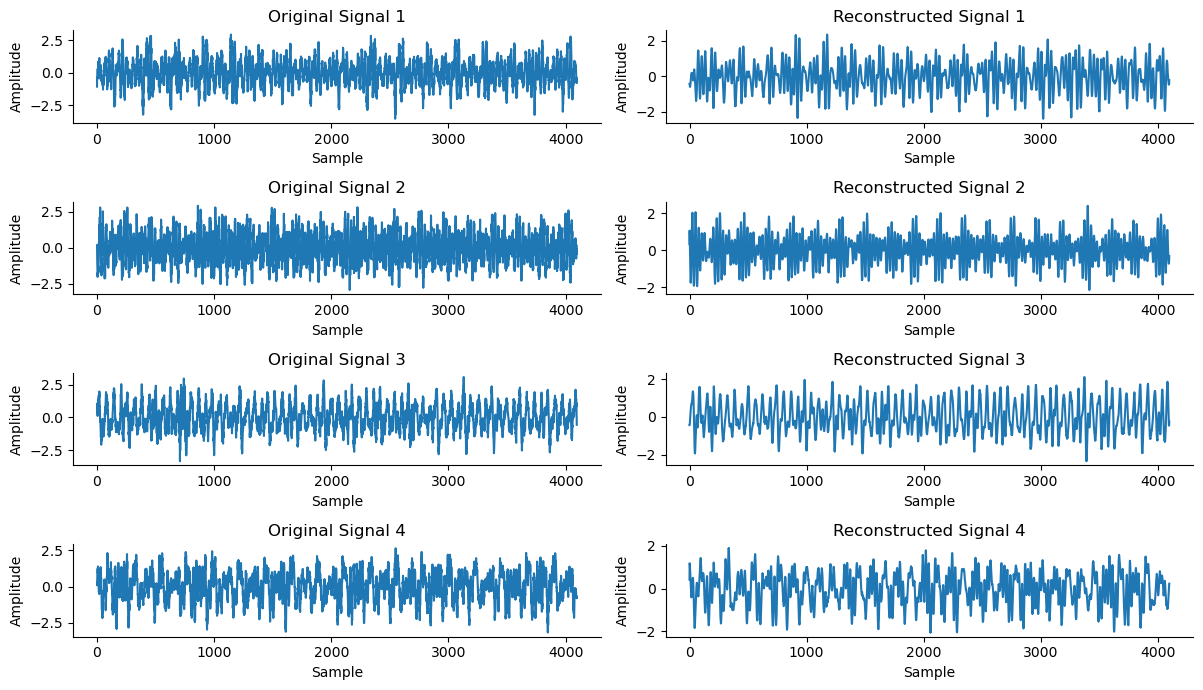

In [11]:
data_vision.VAE_1d_after_train_see(model, test_dl, args)

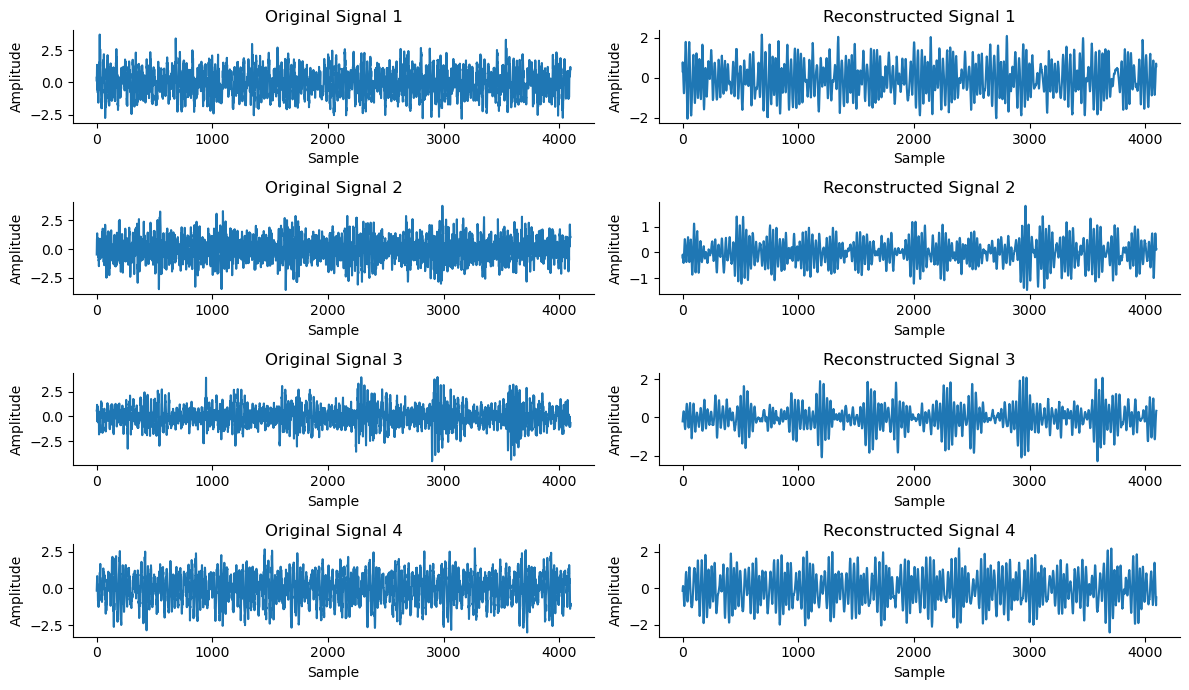

In [18]:
data_vision.VAE_1d_after_train_see(model, test_dl, args)